## Use Heart Disease [Dataset](https://github.com/cksajil/DSAIRP25/blob/main/datasets/heart_disease.csv) and answer the following questions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Find the top 5 important features to the target column

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Top 5 Important Features:
cp         0.136494
ca         0.123180
thal       0.122048
thalach    0.119684
oldpeak    0.117045
dtype: float64


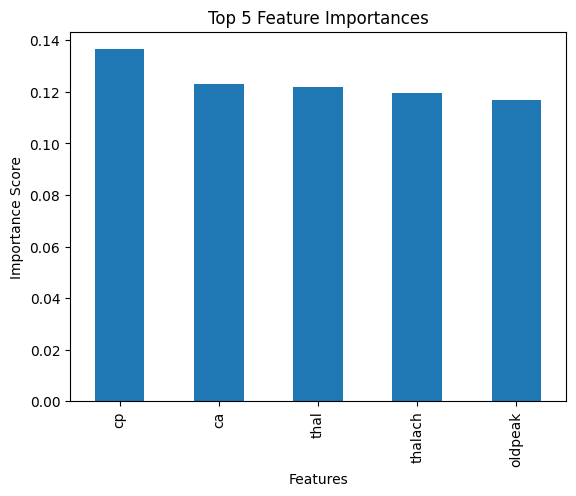

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)
df = df.fillna(df.median())


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

top5 = importances.head(5)
print("Top 5 Important Features:")
print(top5)

plt.figure()
top5.plot(kind='bar')
plt.title('Top 5 Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

## 2. Perform Box-Cox Transformations to relevant features

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)
df = df.fillna(df.median())
X = df.drop('target', axis=1)
skewness = X.apply(skew)
boxcox_features = [
    col for col in X.columns
    if (X[col] > 0).all() and abs(skewness[col]) > 1
]

print("Features requiring Box-Cox transformation:")
print(boxcox_features)

print("\nSkewness values:")
print(skewness.sort_values(ascending=False))


Features requiring Box-Cox transformation:
['chol']

Skewness values:
fbs         1.968452
ca          1.259342
oldpeak     1.209127
chol        1.072500
trestbps    0.738685
exang       0.691641
cp          0.528680
restecg     0.180176
age        -0.248502
slope      -0.478433
thalach    -0.513025
thal       -0.523622
sex        -0.850202
dtype: float64


In [ ]:
cols = ['chol', 'oldpeak', 'ca']

df_boxcox = df.copy()

for col in cols:
    data = df_boxcox[col]

    if (data <= 0).any():
        data = data + abs(data.min()) + 1

    print(f"{col} skewness before: {skew(data):.2f}")

    df_boxcox[col], lam = boxcox(data)


    print(f"{col} skewness after : {skew(df_boxcox[col]):.2f}")
    print(f"{col} lambda        : {lam:.2f}\n")

print(df_boxcox[cols].head())


chol skewness before: 1.07
chol skewness after : -0.00
chol lambda        : -0.10

oldpeak skewness before: 1.21
oldpeak skewness after : 0.11
oldpeak lambda        : -0.45

ca skewness before: 1.26
ca skewness after : 0.39
ca lambda        : -1.22

       chol   oldpeak        ca
0  4.138423  0.595324  0.604008
1  4.113095  1.044062  0.000000
2  4.022191  0.973148  0.000000
3  4.113095  0.000000  0.467210
4  4.325815  0.845648  0.667186


## 3. Perform Feature Binning to Age Column and add it as a new column to the dataset

In [ ]:
df['age_bin'] = pd.qcut(df['age'], q=5, labels=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bin
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,4
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,3


## 4. Find the most orthogonal feature to the 'chol' feature

In [ ]:


corr = df.corr()['chol'].drop('chol')

corr_sorted = corr.abs().sort_values()

print(corr_sorted)


slope       0.014248
thalach     0.021772
fbs         0.026917
oldpeak     0.064880
exang       0.067382
ca          0.074259
cp          0.081641
target      0.099966
thal        0.100244
trestbps    0.127977
restecg     0.147410
sex         0.198258
age         0.219823
Name: chol, dtype: float64


In [ ]:
most_orthogonal_feature = corr_sorted.index[0]
orthogonal_value = corr_sorted.iloc[0]

print("Most orthogonal feature to 'chol':", most_orthogonal_feature)
print("Absolute correlation value:", orthogonal_value)


Most orthogonal feature to 'chol': slope
Absolute correlation value: 0.014247867919343115
